In [1]:
%cd "C:\Users\Lenovo\PycharmProjects\Fixed_Income"

C:\Users\Lenovo\PycharmProjects\Fixed_Income


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from models.CIR import CIR

In [3]:
df = pd.read_csv("data/10_years_data.csv", index_col=0, parse_dates=True)
df.head()

,0.08333333333333333,0.25,0.5,1.0,2.0,3.0,5.0,7.0,10.0,20.0,30.0
2016-01-04,0.17,0.22,0.49,0.61,1.02,1.31,1.73,2.06,2.24,2.64,2.98
2016-01-05,0.20,0.20,0.49,0.68,1.04,1.32,1.73,2.06,2.25,2.67,3.01
2016-01-06,0.21,0.21,0.47,0.67,0.99,1.26,1.65,1.98,2.18,2.59,2.94
2016-01-07,0.20,0.20,0.46,0.66,0.96,1.22,1.61,1.94,2.16,2.56,2.92
2016-01-08,0.20,0.20,0.45,0.64,0.94,1.20,1.57,1.91,2.13,2.55,2.91


a (mean reversion) = 0.500000
b (long-term mean) = 0.021636
sigma (volatility) = 0.020000
Feller condition satisfied: True


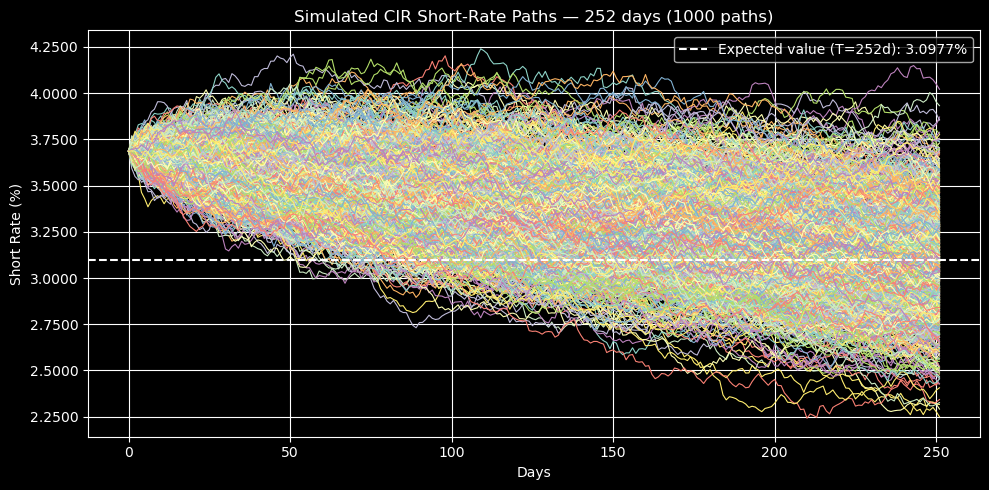

In [4]:
cir = CIR(df)
cir.simulate_paths(n_paths=1000, T=252, sampling_period="M")

In [5]:
window = 756
step = 50
a_list, b_list, sigma_list = [], [], []

for i in range(0, len(df) - window, step):
    cir = CIR(df[i: i + window])
    a0, b0, sigma0, _ = cir.calibrate(verbose=False)
    a_list.append(a0)
    b_list.append(b0)
    sigma_list.append(sigma0)

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
axes[0].plot(a_list, color='green');  axes[0].set_ylabel('a')
axes[1].plot(b_list, color='yellow'); axes[1].set_ylabel('b')
axes[2].plot(sigma_list, color='blue'); axes[2].set_ylabel('sigma')

C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0

KeyboardInterrupt

